<a href="https://colab.research.google.com/github/Aloulou22/AloulouProjects/blob/main/Star_Detecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**





















In [ ]:
# Importing relevant libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# Import Dataset
df = pd.read_csv("/content/stardetecting.csv")

In [ ]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


**0  → Brown Dwarf**




**1  → Red Dwarf**




**2  → White Dwarf**




**3  → Main Sequence**




**4  → Supergiants**



**5  → Hypergiants ***




In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
# Clean dataset
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

=> No NaN Values

=> My dataset is clean

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
# Data transformation (label encoder fit transform)
label_encoder = LabelEncoder()

# Encode each column individually
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

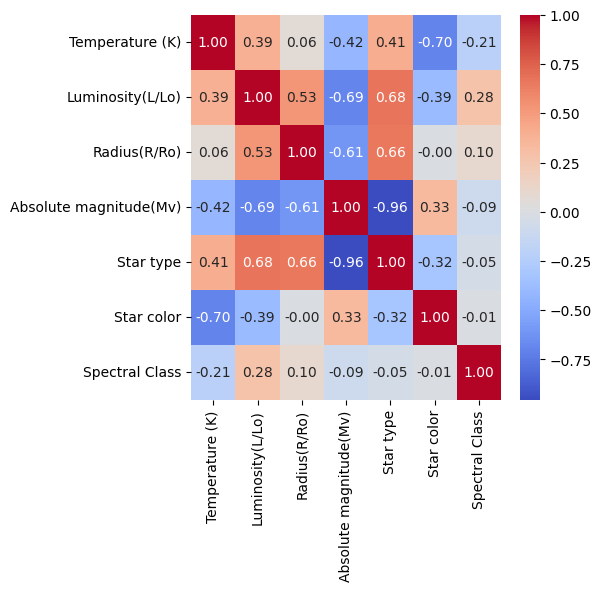

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,annot=True , cmap='coolwarm' , fmt='.2f')
plt

# **Data Visualization**





<ipython-input-43-0115fe7f8c6c>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<Axes: title={'center': 'Bar Plot Of Star Type'}, xlabel='Star Type', ylabel='Star Type Count'>

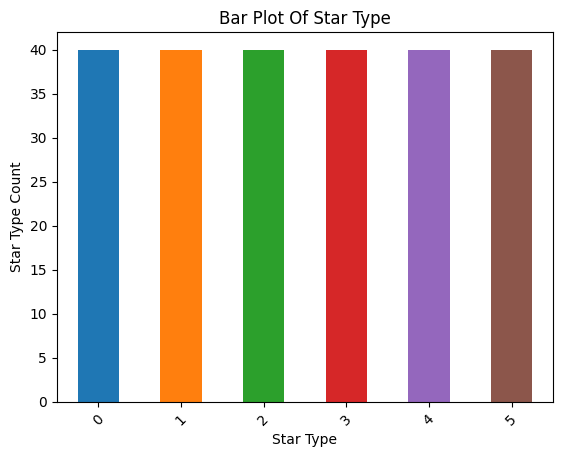

In [ ]:
# Create a bar chart to show the distribution of star type 0
plt.xlabel("Star Type")
plt.ylabel("Star Type Count")
plt.title("Bar Plot Of Star Type")

# Get the number of unique star types
num_star_types = len(df['Star type'].unique())

# Choose a colormap
cmap = cm.get_cmap('tab10')


vc = df['Star type'].value_counts()
vc.plot.bar(rot=45, color=cmap.colors[:num_star_types])

In [ ]:
# Create a pie chart to show the distribution of star type
fig2 = px.pie(df, names='Star type', title='Star Type Distribution')
fig2.show()

In [ ]:
# Create a histogram to show the distribution of Luminosity(L/Lo)
fig = px.histogram(df, x='Luminosity(L/Lo)', nbins=10)
fig.update_layout(title='The Distribution Of Luminosity(L/Lo)')
fig.show()

In [ ]:
# Create a scatter plot to show the relationship between Star type and Absolute magnitude(Mv)
fig3 = px.scatter(df, x='Star type', y='Absolute magnitude(Mv)')
fig3.update_layout(title='Relationship between Absolute magnitude(Mv) and Star type')
fig3.show()

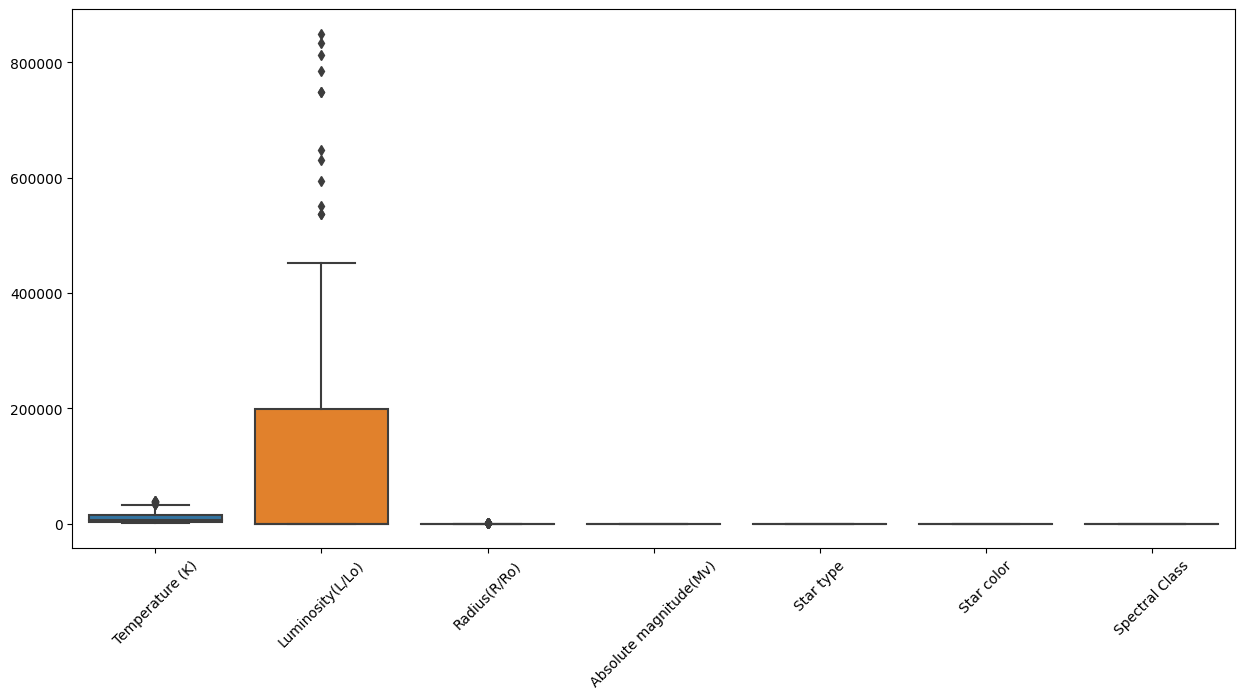

In [ ]:
# Detecting outliers

plt.figure(figsize=(15, 7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# **Machine Learning - Classification**







In [ ]:
# Feature extraction
x = df.drop('Star type', axis=1)
y = df['Star type']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1 ,random_state=42)

In [ ]:
# Knn code

n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

# Finding the best K value
max_value = max(scores)
max_index = scores.index(max_value) +1
print('---------------------')
print('The best value of k neighbors is : ' ,max_index)
print('The best value of accuracy from Knn trainng is : ',max_value)

Accuracy for k= 1 is: 0.67
Accuracy for k= 2 is: 0.71
Accuracy for k= 3 is: 0.71
Accuracy for k= 4 is: 0.5
Accuracy for k= 5 is: 0.71
Accuracy for k= 6 is: 0.58
Accuracy for k= 7 is: 0.62
Accuracy for k= 8 is: 0.58
Accuracy for k= 9 is: 0.58
Accuracy for k= 10 is: 0.58
Accuracy for k= 11 is: 0.58
Accuracy for k= 12 is: 0.58
Accuracy for k= 13 is: 0.54
Accuracy for k= 14 is: 0.42
Accuracy for k= 15 is: 0.58
Accuracy for k= 16 is: 0.46
Accuracy for k= 17 is: 0.5
Accuracy for k= 18 is: 0.42
Accuracy for k= 19 is: 0.5
Accuracy for k= 20 is: 0.62
Accuracy for k= 21 is: 0.62
Accuracy for k= 22 is: 0.71
Accuracy for k= 23 is: 0.71
Accuracy for k= 24 is: 0.75
Accuracy for k= 25 is: 0.71
Accuracy for k= 26 is: 0.67
Accuracy for k= 27 is: 0.75
Accuracy for k= 28 is: 0.62
Accuracy for k= 29 is: 0.67
---------------------
The best value of k neighbors is :  24
The best value of accuracy from Knn trainng is :  0.75


Text(0, 0.5, 'Testing Accuracy')

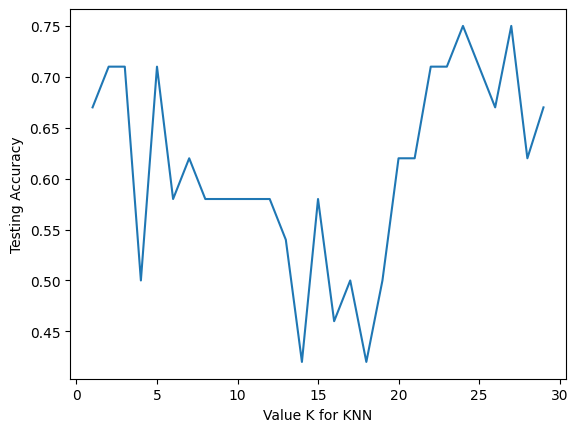

In [ ]:
# Testing the accuracy
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion="gini", splitter='random', max_depth=10, min_samples_split=12) #"gini" used for measuring impurity in a dataset.
dtree.fit(x_train, y_train)   # Fitting our model
y_pred1 = dtree.predict(x_test)   # Evaluating our model
print("Score: {}".format(accuracy_score(y_test, y_pred1)))

Score: 0.9583333333333334


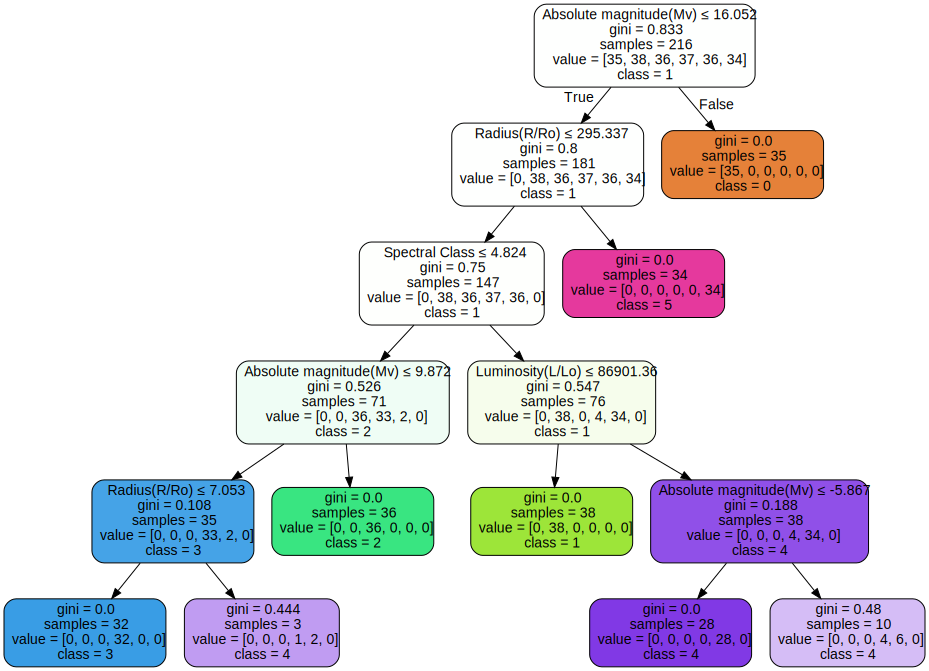

In [ ]:
# Plot DT
# Export the decision tree to a Graphviz dot format
dot_data = export_graphviz(dtree, out_file=None, feature_names=x.columns, class_names=["0", "1","2","3","4","5"],
                           filled=True, rounded=True, special_characters=True)

# Render the decision tree and display it
graph = graphviz.Source(dot_data)
graph.render("data_modified")
graph

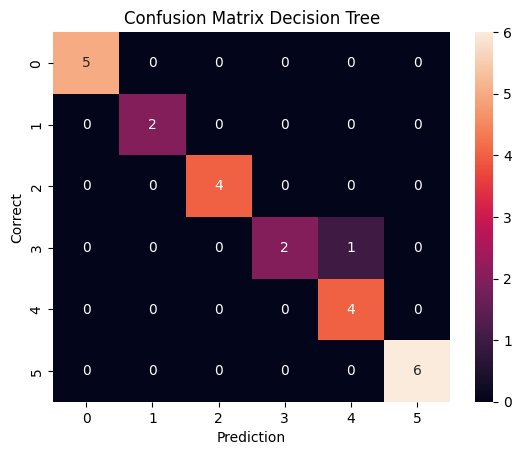

In [ ]:
# Creating confusion matrix to evaluate the decision tree model performance
confusion_matrix = pd.crosstab(y_test, y_pred1, rownames=['Correct'], colnames=['Predictions'])
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix Decision Tree")
plt.show()

In [ ]:
#classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      0.67      0.80         3
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.97      0.96      0.96        24



In [ ]:
# Random forest code
clf=RandomForestClassifier(n_estimators=10)  #Creating our random forest
clf.fit(x_train, y_train)  #Training our model
y_pred2=clf.predict(x_test)  #Testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 1.0


# **Test The Model**





In [ ]:
# Using the model
new_data = {
    'Temperature (K)': [4000],
    'Luminosity(L/Lo)': [0.001],
    'Radius(R/Ro)': [0.2],
    'Absolute magnitude(Mv)': [12.0],
    'Star color': ['0'],
    'Spectral Class': ['2']
}

# creation dataframe
new_data_df = pd.DataFrame(new_data)

# Make a prediction for the new data using the trained model
new_data_prediction = clf.predict(new_data_df)
new_data_prediction1 = dtree.predict(new_data_df)
new_data_prediction2 = knn.predict(new_data_df)


# Display the result
'''Random Forest'''
print("The result of random forest training is : " )
if new_data_prediction[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')


'''Decision Tree'''
print("The result of decision tree training is : " )
if new_data_prediction1[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction1[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction1[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction1[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction1[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')

'''Knn'''
print("The result of Knn training is : " )
if new_data_prediction2[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction2[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction2[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction2[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction2[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')

The result of random forest training is : 
The star is a White Dwarf


The result of decision tree training is : 
The star is a White Dwarf


The result of Knn training is : 
The star is a Main Sequence star


